In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the dataset

In [2]:
df = pd.read_csv('/content/data.csv')

In [4]:
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


###**Remove and handle Null Values**

In [5]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

Check whether it is balanced or not?

In [9]:
df['y'].value_counts()

0    1238
1     981
Name: y, dtype: int64

it is slightly imbalanced so,**oversampling** is done

In [19]:
df1 = df[df['y']==1]

In [21]:
df1.shape

(981, 3)

In [22]:
1238-981

257

In [24]:
df1o = df1.sample(257)

In [25]:
df2 = df.copy()

In [32]:
data = pd.concat([df2,df1o])

##Now the data is balanced

distribution of Y in pie chart


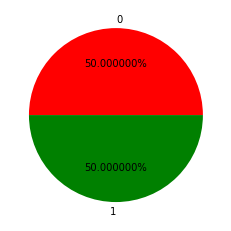

In [33]:
bal_data = data['y'].value_counts()
print('distribution of Y in pie chart')
plt.pie(bal_data,labels=['0','1'],colors=['red','green'],autopct='%2f%%')
plt.show()

In [34]:
data.describe()

,x1,x2,y
count,2476.000000,2.476000e+03,2476.000000
mean,-5.893989,8.036959e+04,0.500000
std,74.990544,2.827497e+06,0.500101
min,-134.369160,-1.348761e+02,0.000000
25%,-72.840234,-7.940891e+01,0.000000
50%,-11.234881,-2.102422e-01,0.500000
75%,59.304584,6.368618e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [48]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [49]:
x.head()

,x1,x2
0,-119.366669,115.000000
1,-101.108044,97.777159
2,-130.278658,106.767654
3,-114.703415,101.195477
4,-119.366669,115.000000


In [50]:
y.tail()

440    1
9      1
120    1
305    1
798    1
Name: y, dtype: int64

### value sare normalized and outliers are removed

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [53]:
x = sc.fit_transform(x)

In [62]:
x = pd.DataFrame(x)
x.head(10)
x.rename(columns={0:'x1',1:'x2'},inplace=True)
x.shape

(2476, 2)

###Split dataset into training and testing

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [69]:
x_train.head()

,x1,x2
1950,1.602703,-0.028390
596,0.361778,-0.028422
1635,-0.480237,-0.028458
811,-1.405820,-0.028409
335,0.019449,-0.028440


In [70]:
y_test.head()

25      1
1452    0
2176    0
2117    0
1328    0
Name: y, dtype: int64

Hyperparameter tunning for KNN to pick optimal value k

In [71]:
from sklearn.neighbors import KNeighborsClassifier

Error curve to find the best K value on parameter

[0.35603000577034044, 0.345066358915176, 0.3502596653202539, 0.3525678015002885, 0.36468551644547026, 0.36699365262550493, 0.36757068667051357, 0.3658395845354876, 0.37276399307559144, 0.37334102712060013, 0.36526255049047895, 0.3681477207155222, 0.37160992498557416, 0.3762261973456434, 0.38834391229082516, 0.3814195037507213, 0.3929601846508944, 0.3912290825158684, 0.3918061165608771, 0.395268320830929, 0.4021927293710329, 0.4004616272360069, 0.40565493364108485, 0.4039238315060589, 0.40796306982111946, 0.4085401038661281, 0.4166185804962493, 0.4229659549913445, 0.42008078476630123, 0.4275822273514137, 0.42873629544143105, 0.42642815926139643, 0.4293133294864397, 0.42238892094633584, 0.4229659549913445, 0.4270051933064051, 0.4235429890363531, 0.4281592613964224, 0.41950375072129253, 0.4177726485862666, 0.42238892094633584, 0.42642815926139643, 0.4212348528563185, 0.4212348528563185, 0.4212348528563185, 0.4275822273514137, 0.4270051933064051, 0.42469705712637046, 0.42238892094633584, 0

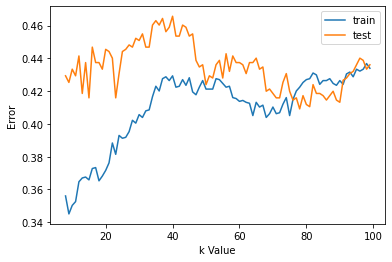

In [72]:
error1= []
error2= []
for k in range(8,100):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(8,100),error1,label="train")
plt.plot(range(8,100),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
print(error1)
print(error2)
plt.show()

*It is concluded that K value is 50*

Train different Machine Learning models:
####Logistic Regression
####SVM with Linear Kernel
###SVM with RBF Kernel
####Decision Tree
####KNN


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
lr = LogisticRegression()
svcl = SVC(kernel='linear')
svcr = SVC(kernel='rbf',gamma=10)#80=55.4 low score on high gama
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=8) #criterion Gini has overfitting problem so entropy is better 
knn1 = KNeighborsClassifier(n_neighbors=27) #57 = accuracy 55 so its  reduced then also no change or impact on score

In [100]:
models = [lr,svcl,svcr,dtc,knn1]
def model():
    for i in models:
     print(f'fitting the {i} model')
     i.fit(x_train,y_train)
model()


fitting the LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) model
fitting the SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) model
fitting the SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) model
fitting the DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth

##prediction on test data

In [101]:
y_predlr = lr.predict(x_test)
y_predsvcl = svcl.predict(x_test)
y_predsvcr = svcr.predict(x_test)
y_preddtc = dtc.predict(x_test)
y_predKnn1 = knn1.predict(x_test)

###Evaluation part on every model to predict the best Algorithm given

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

the accuracy score Logistic Regression 0.5598923283983849
confusion matrix Logistic Regression
[[199 177]
 [150 217]]
the classification report Logistic Regression
              precision    recall  f1-score   support

           0       0.57      0.53      0.55       376
           1       0.55      0.59      0.57       367

    accuracy                           0.56       743
   macro avg       0.56      0.56      0.56       743
weighted avg       0.56      0.56      0.56       743

the accuracy score Support vector Linear kernal 0.5598923283983849
confusion matrix Support vector Linear kernal
[[199 177]
 [150 217]]
the classification report Support vector Linear kernal
              precision    recall  f1-score   support

           0       0.57      0.53      0.55       376
           1       0.55      0.59      0.57       367

    accuracy                           0.56       743
   macro avg       0.56      0.56      0.56       743
weighted avg       0.56      0.56      0.56   

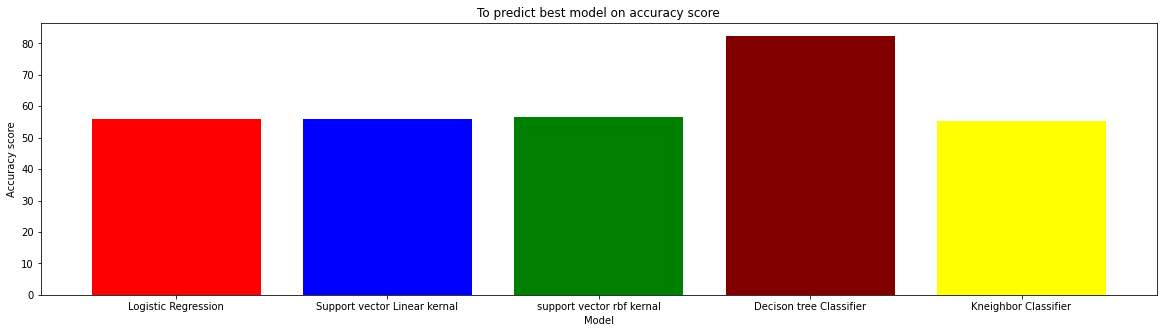

In [102]:
pred = {'Logistic Regression':y_predlr,'Support vector Linear kernal':y_predsvcl,'support vector rbf kernal':y_predsvcr,'Decison tree Classifier':y_preddtc,'Kneighbor Classifier':y_predKnn1}
score_model = []
for i in pred.keys():
  exec(f'ac = accuracy_score(y_test,pred[i])')
  print(f'the accuracy score {i}',ac)
  score_model.append(ac*100)
  print(f'confusion matrix {i}')
  exec(f'cm = confusion_matrix(y_test,pred[i])')
  print(cm)
  print(f'the classification report {i}')
  exec(f'cr = classification_report(y_test,pred[i])')
  print(cr)
plt.figure(1,(20,5))
plt.bar(x=pred.keys(),height=score_model,color=['red','blue','green','maroon','yellow'])
plt.xlabel('Model')
plt.ylabel('Accuracy score')
plt.title('To predict best model on accuracy score')
plt.show()

###the best model is chosen by comparing eachother with their accuracy score is **DECISION TREE CLASSIFIER** it has high accuracy which is shown above graph and moreover than that score precision score is **87& 79** (it show all the positive value is predicted correctly is high.

In [106]:
print('the training score of decsion tree classifier',dtc.score(x_train,y_train))
print('the testing score of decsion tree classifier',dtc.score(x_test,y_test))
# it is not facing any overfitting problem on general DTC disadvantages

the training score of decsion tree classifier 0.8263127524523947
the testing score of decsion tree classifier 0.8236877523553163


####Logistic Regression VS Decision tree classifier == high accuracy difference
####Svc linear kernel VS Decision tree classifier == confusion matrix is better (misclassification is high)
####Svc rbf kernel VS Decision tree classifier ==confusion matrix is better (misclassification is high)
####Kneighbors classifier VS Decision tree classifier == precision and recall are poor compare with DTC

## From the true value **77 & 88** % is predictly correctly by assuming the recall

#Therefore Decision Tree Classifier is prefect model for this dataset

#*********************************************************** END ****************************************************************